In [1]:
#!usr/bin/python

""" Imports and plots the E values for the simulated vs. actual 
    ecosystem data. Also looks at the frequency distributions 
    of the E values in both simulated and actual fitted results."""

__author__ = 'Katie Hindson (kah15@ic.ac.uk)'
__version__ = '0.0.1'
		
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.patches as mpatches
from pylab import *
from scipy.optimize import curve_fit
import random
%matplotlib inline

In [2]:
sim_df = pd.read_csv('../Results/median_temps/lognormal_dist/richness_wrt_lat/med_temps_NOT_CONVERTED_simulated_E_B0_sensitivity.csv')
actual_df = pd.read_csv("../Results/median_temps/sites_boltz_fit_median_temps_only_results.csv")

# sorting into ascending order of siteID values since this way the indexing of the 
# two data frames will be the same.

actual_df = actual_df.sort_values(by = 'site_ID', ascending = True)
sim_df = sim_df.sort_values(by = 'siteID', ascending = True)

# getting the simulated E and lnB0 values as the means of the 150 iterations
E_sim_mean = sim_df.groupby('siteID')['E'].mean().tolist()
E_sim_median = sim_df.groupby('siteID')['E'].median().tolist()

# Making a data frame of the site IDs and their corresponding E simulated and E actual.

E_vals = pd.DataFrame({'siteID' : actual_df.site_ID, 'E_sim_mean' : E_sim_mean,
                       'E_sim_median' : E_sim_median, 'E_actual' : actual_df.E, 
                       'lat': actual_df.lat})

# removing any values that are Nan
E_vals = E_vals[E_vals.siteID.notnull()]
E_vals = E_vals[E_vals.E_sim_mean.notnull()]
E_vals = E_vals[E_vals.E_sim_median.notnull()]
E_vals = E_vals[E_vals.E_actual.notnull()]
E_vals = E_vals[E_vals.E_sim_mean != -np.inf]
E_vals = E_vals[(E_vals.E_actual > 0) & (E_vals.E_actual < 2)]

In [3]:
E_vals['abs_lat'] = np.abs(E_vals.lat)
E_vals['lat_range'] = [np.nan] * len(E_vals.abs_lat)
E_vals['var_E'] = [np.nan] * len(E_vals.abs_lat)
E_vals['var_E_actual'] = [np.nan] * len(E_vals.abs_lat)

E_vals.lat_range.loc[(E_vals.abs_lat > -1) & (E_vals.abs_lat <= 30)] = ['0-30 (Tropical Lat)'] * len(E_vals[(E_vals.abs_lat > -1) & (E_vals.abs_lat <= 30)].siteID)
E_vals.lat_range.loc[(E_vals.abs_lat > 30) & (E_vals.abs_lat <= 60)] = ['31-60 (Mid Lat)'] * len(E_vals[(E_vals.abs_lat > 30) & (E_vals.abs_lat <= 60)].siteID)
E_vals.lat_range.loc[(E_vals.abs_lat > 60) & (E_vals.abs_lat <= 90)] = ['61-90 (Upper Lat)'] * len(E_vals[(E_vals.abs_lat > 60) & (E_vals.abs_lat <= 90)].siteID)

trop_var = np.var(E_vals.E_sim_mean[E_vals.lat_range == '0-30 (Tropical Lat)'])
E_vals.loc[E_vals.lat_range == '0-30 (Tropical Lat)', 'var_E'] = trop_var

mid_var = np.var(E_vals.E_sim_mean[E_vals.lat_range == '31-60 (Mid Lat)'])
E_vals.loc[E_vals.lat_range == '31-60 (Mid Lat)', 'var_E'] = mid_var

upper_var = np.var(E_vals.E_sim_mean[E_vals.lat_range == '61-90 (Upper Lat)'])
E_vals.loc[E_vals.lat_range == '61-90 (Upper Lat)', 'var_E'] = upper_var

trop_var_actual = np.var(E_vals.E_actual[E_vals.lat_range == '0-30 (Tropical Lat)'])
E_vals.loc[E_vals.lat_range == '0-30 (Tropical Lat)', 'var_E_actual'] = trop_var_actual

mid_var_actual = np.var(E_vals.E_actual[E_vals.lat_range == '31-60 (Mid Lat)'])
E_vals.loc[E_vals.lat_range == '31-60 (Mid Lat)', 'var_E_actual'] = mid_var_actual 

upper_var_actual = np.var(E_vals.E_actual[E_vals.lat_range ==  '61-90 (Upper Lat)'])
E_vals.loc[E_vals.lat_range == '61-90 (Upper Lat)', 'var_E_actual'] = upper_var_actual


/home/cmee10/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


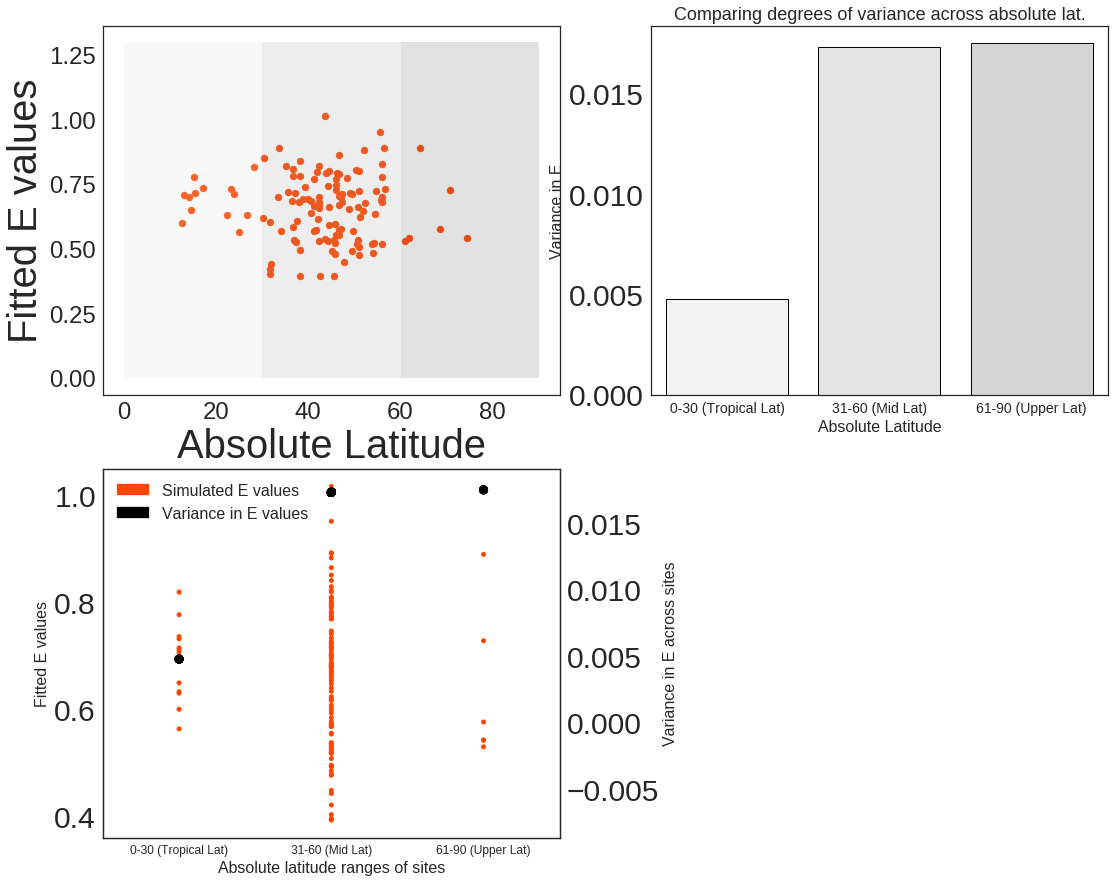

In [7]:
fig, ax = plt.subplots(figsize = (16, 13))
fig.tight_layout()

E_vals = E_vals.sort_values(by = 'abs_lat',ascending = True )

with plt.style.context("seaborn-white"):
    ax1 = plt.subplot(2, 2, 1)
    plt.fill([0, 30, 30, 0], [0, 0, 1.3, 1.3], 'gainsboro', alpha = 0.2)
    plt.fill([30, 60, 60, 30], [0, 0, 1.3, 1.3], 'darkgray', alpha = 0.2)
    plt.fill([60, 90, 90, 60], [0, 0, 1.3, 1.3], 'dimgray', alpha = 0.2)
    plt.scatter(np.abs(E_vals.lat),  E_vals.E_sim_mean, color = 'orangered', s = 50)
    #plt.title('Comparing fitted E values against absolute lat. \nin simulation with richness as a function of abs. lat.', 
             # fontsize = 18)
    plt.xlabel('Absolute Latitude', fontsize = 40)
    plt.ylabel('Fitted E values', fontsize = 40)
    plt.xticks(fontsize = 24)
    plt.yticks(fontsize = 24)

    low_lat = mpatches.Patch(color='gainsboro', alpha = 0.2, label='Tropical Lats')
    mid_lat = mpatches.Patch(color = 'darkgray', alpha = 0.2, label = 'Mid Lats')
    upper_lat = mpatches.Patch(color = 'dimgray', alpha = 0.2, label = 'Upper Lats')
    #plt.legend(bbox_to_anchor=(-0.1, 1.0), handles=[low_lat, mid_lat, upper_lat], fontsize = 14)

    ax2 = plt.subplot(2, 2, 2)
    pal = sns.light_palette("darkgray")
    sns.barplot(E_vals.lat_range, E_vals.var_E, palette = pal, linewidth = 1, edgecolor = 'black')
    ax2.set_title('Comparing degrees of variance across absolute lat.', fontsize = 18)
    ax2.set_ylabel('Variance in E', fontsize = 16)
    ax2.set_xlabel('Absolute Latitude', fontsize = 16)
    ax2.set_xticklabels(['0-30 (Tropical Lat)','31-60 (Mid Lat)', '61-90 (Upper Lat)'],fontsize = 14)

    ax3 = plt.subplot(2, 2, 3)
    sns.stripplot(E_vals.lat_range, E_vals.E_sim_mean, color = 'orangered', label = 'E values')
    ax3.set_xlabel('Absolute latitude ranges of sites', fontsize = 16)
    ax3.set_xticklabels(['0-30 (Tropical Lat)','31-60 (Mid Lat)', '61-90 (Upper Lat)'],fontsize = 12)
    ax3.set_ylabel('Fitted E values', fontsize = 16)
    #ax3.set_title('Randomly sampled same number of sites \nfrom Mid lat and Tropical lat',
     #            fontsize = 18)
    ax4 = ax3.twinx()
    sns.stripplot(E_vals.lat_range, E_vals.var_E, color = 'black', size = 9)
    ax4.set_ylabel('Variance in E across sites', fontsize = 16)

    blue_patch = mpatches.Patch(color='orangered', label='Simulated E values')
    black_patch = mpatches.Patch(color = 'black', label = 'Variance in E values')
    plt.legend(handles=[blue_patch, black_patch], fontsize = 16)

(0, 0.04)

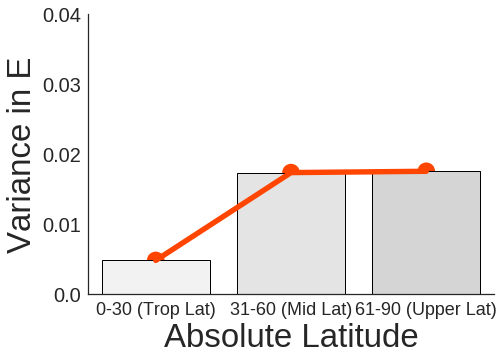

In [8]:
pal = sns.light_palette("darkgray")
paper_rc = {'lines.linewidth': 3, 'lines.markersize': 5}            
sns.set(font_scale=3, style = 'white', rc = paper_rc) 
ax2 = sns.FacetGrid(E_vals, size = 6, aspect = 1.2)
ax2 = ax2.map(sns.barplot, 'lat_range', 'var_E', palette = pal, linewidth = 1, edgecolor = 'black')
ax2 = ax2.map(sns.pointplot,  'lat_range', 'var_E', color = 'orangered')
ax2.set_axis_labels("Absolute Latitude","Variance in E")
plt.subplots_adjust(top=0.9, left = -0.001)
#ax2.fig.suptitle('Comparing variance across absolute latitude')
ax2.set_xticklabels(['0-30 (Trop Lat)','31-60 (Mid Lat)', '61-90 (Upper Lat)'],fontsize = 18)
ax2.set_yticklabels([0.00, 0.01, 0.02, 0.03, 0.04], fontsize = 20)
axes = ax2.axes
axes[0,0].set_ylim(0,0.04)